In [29]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import matplotlib.pyplot as plt
import seaborn as sns
from training_models import Autoencoder, DenoisingAutoencoder, AutoencoderEnsemble
from monitor_models import Autocovariance, AugmentationCrossCovariances, RepresentationCrossCovariances
from os.path import join
import pandas as pd
from directory import RESULTS_DIR, PLOTS_DIR

In [30]:
EXP_NAME = "exp_test"
EVAL_FILE_NAME = "summary.csv"

In [31]:
def _create_method_name(row):
    training_model_name = row["Training model"]
    monitoring_model_name = row["Monitoring model"]

    if training_model_name == Autoencoder().name and monitoring_model_name == Autocovariance().name:
        return "Autocovariance"
    
    if training_model_name == DenoisingAutoencoder().name and monitoring_model_name == Autocovariance().name:
        return "Autocovariance \n(Denoising)"
    
    if training_model_name == Autoencoder().name and monitoring_model_name == AugmentationCrossCovariances().name:
        return "Augmentation Cross-covariances"
    
    if training_model_name == DenoisingAutoencoder().name and monitoring_model_name == AugmentationCrossCovariances().name:
        return "Augmentation Cross-covariances \n(Denoising)"
    
    if training_model_name == AutoencoderEnsemble().name and monitoring_model_name == RepresentationCrossCovariances().name:
        return "Representation Cross-covariances"
    
def plot_rocauc_vs_epochs(df_summary, figsize=(9, 6), ymin = 0.94, ymax=1.0):
    df_summary["Method"] = df_summary.apply(_create_method_name, axis=1)

    train_datasets = df_summary["Training dataset"].unique()
    test_datasets = df_summary["Testing dataset"].unique()

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    for train_idx, training_set in enumerate(train_datasets):
        for test_idx, test_set in enumerate(test_datasets):
            _df = df_summary[(df_summary["Training dataset"] == training_set) & (df_summary["Testing dataset"] == test_set)]

            legend_on = ((train_idx == 1) and (test_idx == 1))
            subplot_obj = sns.lineplot(data=_df, x='Epoch', y='ROC-AUC', hue='Method', ax=axs[train_idx, test_idx], legend=legend_on)

            axs[train_idx, test_idx].set_ylim(ymin, ymax)
            axs[train_idx, test_idx].set_title(f"Training: {training_set.upper()}, Testing: {test_set.upper()}")

            axs[train_idx, test_idx].get_xaxis().set_visible(train_idx == 1)

            if test_idx == 1:
                axs[train_idx, test_idx].set_ylabel("")

            if legend_on:
                subplot_obj.legend(fontsize=10, loc='lower right')

    plt.tight_layout(pad=0)
    plt.savefig(join(PLOTS_DIR, EXP_NAME, "rocaucs_vs_epochs.pdf"), dpi=600)

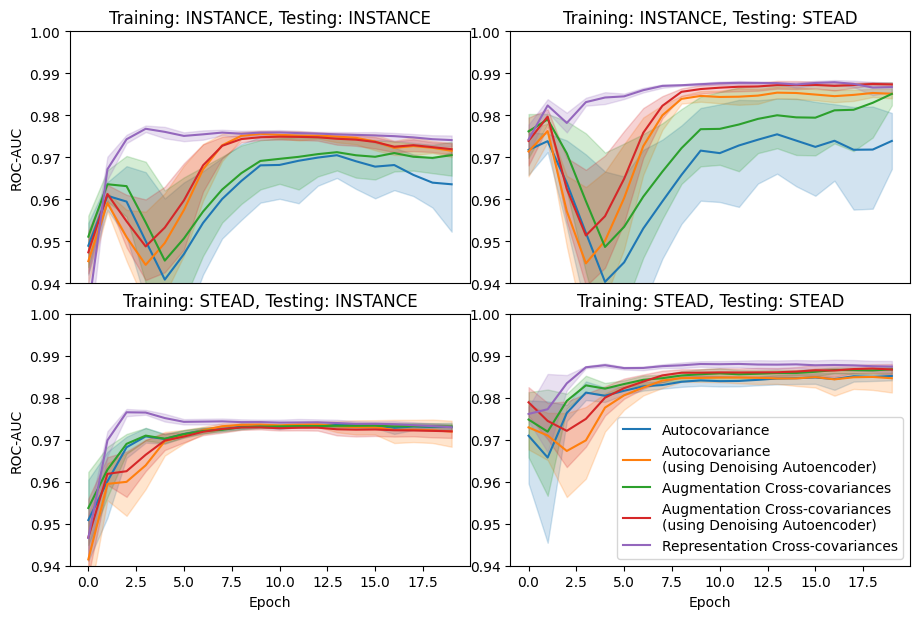

In [32]:
df_summary = pd.read_csv(join(RESULTS_DIR, EXP_NAME, EVAL_FILE_NAME))
plot_rocauc_vs_epochs(df_summary)